## AND

In [ ]:
import numpy as np
from random import random,randint

### Алгоритм обучения персептрона. Первый способ (через функции)

In [ ]:
w1 = random()
w2 = random()
bias = randint(-10,-2)   # W подбирается только при этих значениях смещения (не знаю почему так) - вероятно тут ошибка, хотя ответ верный

X1 = [0,0,1,1]
X2 = [0,1,0,1]

y_target = [0,0,0,1]

y_predict = []

def calculate_sum(x1,x2,w1,w2,delta):
  return (x1*w1 + x2*w2 + delta)


def activation_func(operation_result):
  if operation_result > 0:
    return 1
  else:
    return 0

def prediction(input1,input2,w1,w2, calc_sum, activation):
  y_pred = []
  for i in range(len(input1)):
    sum = calc_sum(input1[i],input2[i],w1,w2,bias)
    y_pred.append(activation(sum))
  return y_pred

def w_config(input1, input2, y_pred, y_true, w1, w2, delta, pred_operation,calc_sum,activation):
  perfect = False
  while not perfect:
    perfect = True
    y_pred = pred_operation(input1,input2,w1,w2,calc_sum,activation)
    for i in range(len(input1)):
      if y_pred[i] != y_true[i]:
        perfect = False
        if y_pred[i] == 0:
          w1 += input1[i]
          w2 += input2[i]
          delta += 1
        else:
          w1 -= input1[i]
          w2 -= input2[i]
          delta -=1     
  return (w1,w2,delta)

In [ ]:
print(w1,w2,bias)

0.6717534038418486 0.6674672194115314 -2


In [ ]:
y_predict = prediction(X1,X2,w1,w2, calculate_sum,activation_func)
y_predict

[0, 0, 0, 0]

In [ ]:
W = w_config(X1,X2, y_predict, y_target, w1, w2,bias,prediction,calculate_sum,activation_func)
W

(1.6717534038418487, 1.6674672194115314, -1)

In [ ]:
y_predict = prediction(X1,X2,W[0],W[1], calculate_sum,activation_func)
y_predict

[0, 0, 0, 1]

### Алгоритм обучения персептрона. Второй способ (ООП)

In [80]:
class Neuron:
  def __init__(self):
    self.w1 = random()
    self.w2 = random()

    self.bias = randint(-10,-2)    # W подбирается только при этих значениях смещения (не знаю почему так) - вероятно тут ошибка, хотя ответ верный

    self.y_predict = []

  def calculate_sum(self,x1,x2,w1,w2,delta):
    return (x1*w1 + x2*w2 + delta)
  

  def activation_func(self, calculate_sum):
    if calculate_sum > 0:
      return 1
    else:
      return 0

  def prediction(self, X1_input,X2_input):
    y_pred = []
    for i in range(len(X1_input)):
      sum = self.calculate_sum(X1_input[i],X2_input[i],self.w1,self.w2,self.bias)
      y_pred.append(self.activation_func(sum))
    return y_pred

  def w_config(self,X1_input,X2_input,y_true,learning_rate = 1):
    lr = learning_rate
    perfect = False
    while not perfect:
      perfect = True
      self.y_predict = self.prediction(X1_input,X2_input)
      for i in range(len(X1_input)):
        if self.y_predict[i] != y_true[i]:
          perfect = False
          if self.y_predict[i] == 0:
            self.w1 += lr*X1_input[i]
            self.w2 += lr*X2_input[i]
            self.bias += lr*1
          else:
            self.w1 -= lr*X1_input[i]
            self.w2 -= lr*X2_input[i]
            self.bias -= lr*1     
    return (self.w1,self.w2,self.bias)
  

In [81]:
X1 = [0,0,1,1]
X2 = [0,1,0,1]

y_target = [0,0,0,1]

In [82]:
A = Neuron()

In [83]:
W = A.w_config(X1,X2,y_target)
W

(3.121495530384081, 3.8333755057274344, -6)

In [84]:
A.prediction(X1,X2)

[0, 0, 0, 1]

### Алгоритм обучения персептрона. Третий способ (ООП + Numpy)

In [100]:
class Perceptron:
  def __init__(self):
    self.W = np.random.rand(3,1)


  def calculate_sum(self,X_input):
    return np.dot(X_input,self.W)
  

  def activation_func(self,X_input):
    a = self.calculate_sum(X_input)
    return np.where(a > 0, 1,0)

  def w_config(self,X_input,y_input, learning_rate = 1):
    lr = learning_rate
    perfect = False
    while not perfect:
      perfect = True
      y_predict = self.activation_func(X_input)
      for i in range(len(X_input)):
        if y_predict[i] != y_input[i]:
          perfect = False
          if y_predict[i] == 0:
            self.W += lr*X_input[i].reshape(3,1)
          else:
            self.W -= lr*X_input[i].reshape(3,1)   
    return (self.W)

In [101]:
X = np.array([[0,0,1],       # Убрать из класса (подаём из вне)
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
y_target = np.array([[0],    # Убрать из класса (подаём из вне)
                     [0],
                     [0], 
                     [1]])

In [102]:
a = Perceptron()

In [88]:
a.w_config(X,y_target)

array([[ 1.16059902],
       [ 1.20514605],
       [-2.03977066]])

In [89]:
a.activation_func(X)

array([[0],
       [0],
       [0],
       [1]])

### Через градиентный спуск

In [90]:
class Perceptron_gradient:
  def __init__(self):
    self.W = np.random.rand(3,1)


  def calculate_sum(self,X_input):
    return np.dot(X_input,self.W)
  

  def activation_func(self,X_input):
    a = self.calculate_sum(X_input)
    return np.where(a > 0, 1,0)


  def w_config(self,X_input,y_input, learning_rate = 0.3):
    lr = learning_rate
    perfect = False
    while not perfect:
      perfect = True
      y_predict = self.activation_func(X_input)
      for i in range(len(X_input)):
        if y_predict[i] != y_input[i]:
          error = y_input[i] - y_predict[i]
          perfect = False
          self.W -= -lr*2*error*1*X_input[i].reshape(3,1)       
    return (self.W)

In [91]:
X = np.array([[0,0,1],         # Убрать из класса (подаём из вне)
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
y_target = np.array([[0],      # Убрать из класса (подаём из вне)
                     [0],
                     [0], 
                     [1]])

In [92]:
a = Perceptron_gradient()

In [93]:
a.w_config(X,y_target)

array([[ 1.06238422],
       [ 0.85493299],
       [-1.34876299]])

In [94]:
a.activation_func(X)

array([[0],
       [0],
       [0],
       [1]])

## OR

In [95]:
class Perceptron:
  def __init__(self):
    self.W = np.random.rand(3,1)


  def calculate_sum(self,X_input):
    return np.dot(X_input,self.W)
  

  def activation_func(self,X_input):
    a = self.calculate_sum(X_input)
    return np.where(a > 0, 1,0)

  def w_config(self,X_input,y_input, learning_rate = 1):
    lr = learning_rate
    perfect = False
    while not perfect:
      perfect = True
      y_predict = self.activation_func(X_input)
      for i in range(len(X_input)):
        if y_predict[i] != y_input[i]:
          perfect = False
          if y_predict[i] == 0:
            self.W += lr*X_input[i].reshape(3,1)
          else:
            self.W -= lr*X_input[i].reshape(3,1)   
    return (self.W)

In [96]:
X = np.array([[0,0,1],       # Убрать из класса (подаём из вне)
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
y_target = np.array([[0],    # Убрать из класса (подаём из вне)
                     [1],
                     [1], 
                     [1]])

In [97]:
a = Perceptron_gradient()

In [98]:
a.w_config(X,y_target)

array([[ 0.82238347],
       [ 0.71672302],
       [-0.3583208 ]])

In [99]:
a.activation_func(X)

array([[0],
       [1],
       [1],
       [1]])

## Распознавание цифр

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import math
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.array(X_train, dtype = 'float64')
y_train = y_train

X_test = np.array(X_test, dtype = 'float64')
y_test = y_test


##### Нормализация данных. Приведем значение пикселей в диапазон от 0 до 1

X_train = X_train / 255
X_test = X_test / 255

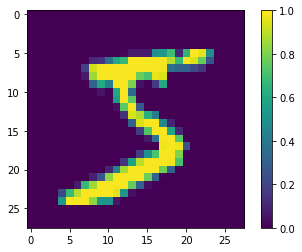

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [ ]:
class Perceptron_gradient:
  def __init__(self,y_target):
    # Каждый вход нейрона - пиксель картинки
    # Всего входов у нейрона 28x28 = 784
    self.W = np.random.rand(785,1) / 1000                  # вектор размерностью (784 + 1) x 1  с учетом смещения
    self.y_target = y_target                               # число, которое будем распознавать

  def calculate_sum(self, X_input):                          # считаем взвешенную сумму
    return np.dot(X_input,self.W)                            # Важно, чтобы размерности векторов были X: 1 x 784+1 (x0 = 1 - для смещения) и W: (784 + 1) x 1  с учетом смещения. Изначально размерность X: 28x28

  def sigmoida(self,X_input):                               # считаем функцию активации
    return 1 /(1 + math.exp(-self.calculate_sum(X_input)))

  def sigmoid_derivative(self,X_input):                     # считаем производную функции активации
    return self.sigmoida(X_input)*(1 - self.sigmoida(X_input))
  
  # считаем, что картинка распознана верно, если функция активации от её вектора > 0.5, иначе картинка распознана неправильно
  def w_config(self, X_input, y_input, learning_rate = 0.01):    # подбираем веса 
    lr = learning_rate                                           # скорость обучения
    # если лейбл картинки совпадает с тем числом, которое мы хотим распознать И выход функции активации меньше 0.5, то:
    if (y_input == self.y_target) and (self.sigmoida(X_input) < 0.5):    # если лейбл картинки совпадает с тем, числом, которое мы хотим распознать, но сумма активации меньше 0.5, то:
      activation_true = 1                                        # стремимся, чтобы функцияя активации равнялась 1                                                
      activation_predict = self.sigmoida(X_input)                # считаем функцию активации
      error = activation_true - activation_predict               # считаем ошибку
      self.W -= -lr * 2 * error * self.sigmoid_derivative(X_input) * X_input.reshape(785,1)      # считаем веса
    # если лейбл картинки НЕ совпадает с тем числом, которое мы хотим распознать И выход функции активации больше 0.5, то:
    elif (y_input != self.y_target) and (self.sigmoida(X_input) > 0.5): 
      activation_true = 0
      activation_predict = self.sigmoida(X_input)
      error = activation_true - activation_predict
      self.W -= -lr * 2 * error * self.sigmoid_derivative(X_input) * X_input.reshape(785,1)

    return self.sigmoida(X_input)

In [ ]:
# Функция обучения на всей выборке
def learning(A, X_input, y_input):
  for i in range(len(X_input)):
    X = np.insert(X_input[i].flatten(),0,1)       # вектор размерностью 1 x 784+1 (x0 = 1 - для смещения)
    A.w_config(X,y_input[i])

In [ ]:
# Функция подсчета ошибки
def test_accuracy(A, y_target, X_input_test = X_test, y_input_test = y_test):
  counter0 = 0     # считаем количество верно угаданных чисел (counter += 1, если хотели 4 и верно её угадали (функция активации > 0.5) и
                                                                # и counter += 1, если число не равно 4, но и функция активации < 0.5)

  counter1 = 0     # считаем количество верно угаданных чисел (counter += 1, если хотели 4 и верно её угадали (функция активации > 0.5))
  counter2 = 0     # считаем общее количество лейблов желаемых чисел во всей выборке 

  for i in range(len(X_input_test)):
    X = np.insert(X_input_test[i].flatten(),0,1)
    if A.sigmoida(X) > 0.5 and y_input_test[i] == y_target:
      counter0 +=1
      counter1 +=1

    elif A.sigmoida(X) < 0.5 and y_input_test[i] != y_target:
      counter0 += 1

    if y_input_test[i] == y_target:
      counter2 +=1

  accuracy = counter0 / len(y_input_test) * 100      # доля верно отгаданных чисел
  accuracy_y_target = counter1 / counter2 * 100      # доля верно отгаданных четвёрок от общего количества четверок

  return (accuracy, accuracy_y_target)

Обучаем 9 нейронов (каждый нейрон распознает одну цифру от 0 до 9) и считаем показатели точности.

In [ ]:
a0 = Perceptron_gradient(0)
learning(a0,X_train,y_train)
test_accuracy(a0,0)

(98.25, 83.36734693877551)

In [ ]:
a1 = Perceptron_gradient(1)
learning(a1,X_train,y_train)
test_accuracy(a1,1)

(99.15, 97.3568281938326)

In [ ]:
a2 = Perceptron_gradient(2)
learning(a2,X_train,y_train)
test_accuracy(a2,2)

(95.37, 55.81395348837209)

In [ ]:
a3 = Perceptron_gradient(3)
learning(a3,X_train,y_train)
test_accuracy(a3,3)

(96.64, 88.91089108910892)

In [ ]:
a4 = Perceptron_gradient(4)
learning(a4,X_train,y_train)
test_accuracy(a4,4)

(97.17, 75.96741344195519)

In [ ]:
a5 = Perceptron_gradient(5)
learning(a5,X_train,y_train)
test_accuracy(a5,5)

(95.03, 46.52466367713004)

In [ ]:
a6 = Perceptron_gradient(6)
learning(a6,X_train,y_train)
test_accuracy(a6,6)

(98.22, 90.91858037578288)

In [ ]:
a7 = Perceptron_gradient(7)
learning(a7,X_train,y_train)
test_accuracy(a7,7)

(98.11999999999999, 89.29961089494164)

In [ ]:
a8 = Perceptron_gradient(8)
learning(a8,X_train,y_train)
test_accuracy(a8,8)

(93.78, 47.43326488706365)

In [ ]:
a9 = Perceptron_gradient(9)
learning(a9,X_train,y_train)
test_accuracy(a9,9)

(93.72, 89.197224975223)

Считаем общую точность: подаём картинку из тестовой выборки на вход каждого из 10 нейронов (каждый из них предварительно обучен распознавать одну цифру от 0 до 9) => считаем функцию активации (сигмоида) для каждого из десяти нейронов => смотрим, для какого из нейронов значение сигмоиды наибольшее (ближе всего к единице) => смотрим на цифру, которую распознает этот нейрон => если она свопадает с лейблом, то увеличиваем счетчик на 1. 
Делим значение счетчика на размер тествой выборки.

In [ ]:
index_max_list = []
counter = 0

for i in range(len(X_test)):
  list_of_val = []
  X = np.insert(X_test[i].flatten(),0,1)
  list_of_val.append(a0.sigmoida(X))
  list_of_val.append(a1.sigmoida(X))
  list_of_val.append(a2.sigmoida(X))
  list_of_val.append(a3.sigmoida(X))
  list_of_val.append(a4.sigmoida(X))
  list_of_val.append(a5.sigmoida(X))
  list_of_val.append(a6.sigmoida(X))
  list_of_val.append(a7.sigmoida(X))
  list_of_val.append(a8.sigmoida(X))
  list_of_val.append(a9.sigmoida(X))
  max_value = max(list_of_val)
  index_max = list_of_val.index(max_value)
  if index_max == y_test[i]:
    counter += 1
  index_max_list.append(index_max)

In [ ]:
accuracy_common = counter / len(X_test) *100
accuracy_common

85.06

Точность "однослойной неройнной сети" равна 85.06%. То есть в 85.06 % процентах случаев данная "однослойная нейронная сеть" верно распознает число на картинке.

Выведем полученные для первых 40 картинок тествой выборки (число 40 было взято произвольно) результаты в dataframe, для наглядности.

In [51]:
y_test_list = []
a0_list = []
a1_list = []
a2_list = []
a3_list = []
a4_list = []
a5_list = []
a6_list = []
a7_list = []
a8_list = []
a9_list = []

for i in range(40):
  X = np.insert(X_test[i].flatten(),0,1)
  a0_list.append(a0.sigmoida(X))
  a1_list.append(a1.sigmoida(X))
  a2_list.append(a2.sigmoida(X))
  a3_list.append(a3.sigmoida(X))
  a4_list.append(a4.sigmoida(X))
  a5_list.append(a5.sigmoida(X))
  a6_list.append(a6.sigmoida(X))
  a7_list.append(a7.sigmoida(X))
  a8_list.append(a8.sigmoida(X))
  a9_list.append(a9.sigmoida(X))
  y_test_list.append(y_test[i])

In [52]:
columns_name = ['Цифра 0','Цифра 1','Цифра 2','Цифра 3','Цифра 4','Цифра 5','Цифра 6','Цифра 7','Цифра 8','Цифра 9','Предсказанная цифра','Лейбл']
df = pd.DataFrame(columns=columns_name)
df['Цифра 0'] = a0_list
df['Цифра 1'] = a1_list
df['Цифра 2'] = a2_list
df['Цифра 3'] = a3_list
df['Цифра 4'] = a4_list
df['Цифра 5'] = a5_list
df['Цифра 6'] = a6_list
df['Цифра 7'] = a7_list
df['Цифра 8'] = a8_list
df['Цифра 9'] = a9_list
df['Предсказанная цифра'] = index_max_list[:40]
df['Лейбл'] =   y_test_list
df

,Цифра 0,Цифра 1,Цифра 2,Цифра 3,Цифра 4,Цифра 5,Цифра 6,Цифра 7,Цифра 8,Цифра 9,Предсказанная цифра,Лейбл
0,0.410686,0.309391,0.393504,0.434292,0.349769,0.396983,0.291114,0.564380,0.374121,0.413519,7,7
1,0.406054,0.362775,0.479821,0.419692,0.219224,0.465992,0.461932,0.205375,0.367351,0.248405,2,2
2,0.314152,0.546543,0.453675,0.436302,0.441089,0.453073,0.418975,0.441060,0.413794,0.421334,1,1
3,0.565715,0.284672,0.335542,0.314230,0.257023,0.329037,0.407182,0.391240,0.347118,0.405655,0,0
4,0.387447,0.375247,0.413430,0.332756,0.521792,0.356426,0.456313,0.432913,0.351776,0.456202,4,4
5,0.285801,0.554801,0.418803,0.444054,0.441232,0.416051,0.376068,0.440861,0.420064,0.433463,1,1
6,0.342624,0.357143,0.340605,0.397178,0.526450,0.441737,0.363473,0.442646,0.435212,0.429042,4,4
7,0.244392,0.497838,0.402145,0.434871,0.428244,0.474052,0.398104,0.432016,0.395783,0.514208,9,9
8,0.360004,0.382948,0.377677,0.204823,0.468871,0.446184,0.484345,0.257369,0.319932,0.421811,6,5
9,0.326120,0.297887,0.294097,0.271954,0.415114,0.312191,0.333001,0.484000,0.453561,0.568965,9,9
